# Fruits Recognizer
**The project aims to create a classification system for 20 different types of fruits found around the world.The types are following :**

1.Apple

2.Grape

3.Kiwi

4.Orange

5.Pineapple

6.Papaya

7.Watermelon

8.Lemon

9.Avocado

10.Respberry

11.Lychee

12.pear

13.Carambola

14.Mango

15.Banana

16.Cherry

17.Strawberry

18.Fig

19.Blueberry

20.Apricot

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size=20
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/Fruit_Recognizer

/content/drive/MyDrive/Fruit_Recognizer


In [ ]:
fruit_labels = ["Apple", "Grape", "Kiwi", "Orange", "Pineapple", "Papaya", "Watermelon", "Lemon", "Avocado", "Raspberry", "Lychee", "Pear", "Carambola", "Mango", "Banana", "Cherry", "Strawberry", "Fig", "Blueberry", "Apricot"]
print(f"Fruits Name : {fruit_labels}")
print("==============================================================================")
print(f"Length of Fruits Labels : {len(fruit_labels)}")

Fruits Name : ['Apple', 'Grape', 'Kiwi', 'Orange', 'Pineapple', 'Papaya', 'Watermelon', 'Lemon', 'Avocado', 'Raspberry', 'Lychee', 'Pear', 'Carambola', 'Mango', 'Banana', 'Cherry', 'Strawberry', 'Fig', 'Blueberry', 'Apricot']
Length of Fruits Labels : 20


In [ ]:
images = search_images_ddg(fruit_labels[0])
print(f"Number of Images : {len(images)}")
print("==================================================================================================")
print(f"Image Url : {images[0]}")


Number of Images : 200
Image Url : https://unternehmer.de/wp-content/uploads/2013/02/Apple-Logo.jpg


In [ ]:
doc(download_url)

# Read Image

In [ ]:
name="apple.jpg"
download_url(images[0],name,show_progress=True)


Path('apple.jpg')

# Visualize Image

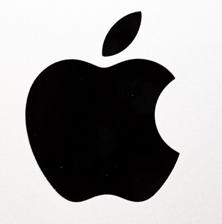

In [ ]:
image=Image.open(name)
image.to_thumb(224,224)

In [ ]:
data_path="my_data"
# if not os.path.exists(data_path):
#   os.mkdir(data_path)

# for fruit_type in fruit_labels:
#   dest=f"{data_path}/{fruit_type}"
#   if not os.path.exists(dest):
#     os.mkdir(dest)

#   try:
#     fruit_image_urls=search_images_ddg(fruit_type)
#     download_images(dest,urls=fruit_image_urls)
#   except:
#     continue

In [ ]:
data_count=get_image_files(data_path)
data_count

(#3403) [Path('my_data/Apple/be84ad18-e913-49f3-9701-3089adc29593.jpg'),Path('my_data/Apple/e7d8f496-7193-42c1-84c3-e2fbacd43474.jpg'),Path('my_data/Apple/612cdb0f-4df2-44bb-b7e4-38dd77e629f8.jpg'),Path('my_data/Apple/a28bc8a4-674c-47aa-af4b-ad69af73ef7a.jpg'),Path('my_data/Apple/8ce4db56-734f-413e-9649-f48c2036c768.jpg'),Path('my_data/Apple/b1d72867-b372-445c-bd78-b54ddd3397ec.jpg'),Path('my_data/Apple/c4ac77de-686f-437e-a715-3822a22e4a6a.jpg'),Path('my_data/Apple/55a1cbb5-afc3-448e-8dd9-4936b9d93f79.jpg'),Path('my_data/Apple/04f4afe6-3da9-4ddb-be9d-672ddd3e2e36.jpg'),Path('my_data/Apple/2c543097-d1c0-41b1-86dd-daa4ec53e7af.jpg')...]

In [ ]:
each_data_count = {label: len(get_image_files(f"{data_path}/{label}")) for label in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, label))}

# Print the count for each class
for label, count in each_data_count.items():
    print(f"{label}: {count} images")

Apple: 60 images
Grape: 177 images
Kiwi: 168 images
Orange: 157 images
Pineapple: 179 images
Papaya: 179 images
Watermelon: 187 images
Lemon: 174 images
Avocado: 180 images
Raspberry: 154 images
Lychee: 190 images
Pear: 182 images
Carambola: 188 images
Mango: 180 images
Banana: 188 images
Cherry: 164 images
Strawberry: 172 images
Fig: 163 images
Blueberry: 173 images
Apricot: 188 images


In [ ]:
fail=verify_images(data_count)
fail

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(#0) []

In [ ]:
fail.map(Path.unlink)

(#0) []

# Data Loaders

In [ ]:
data_block=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2,seed=42),
                     get_y=parent_label,
                     item_tfms=Resize(128))

In [ ]:
dls=data_block.dataloaders(data_path,bs=batch_size)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


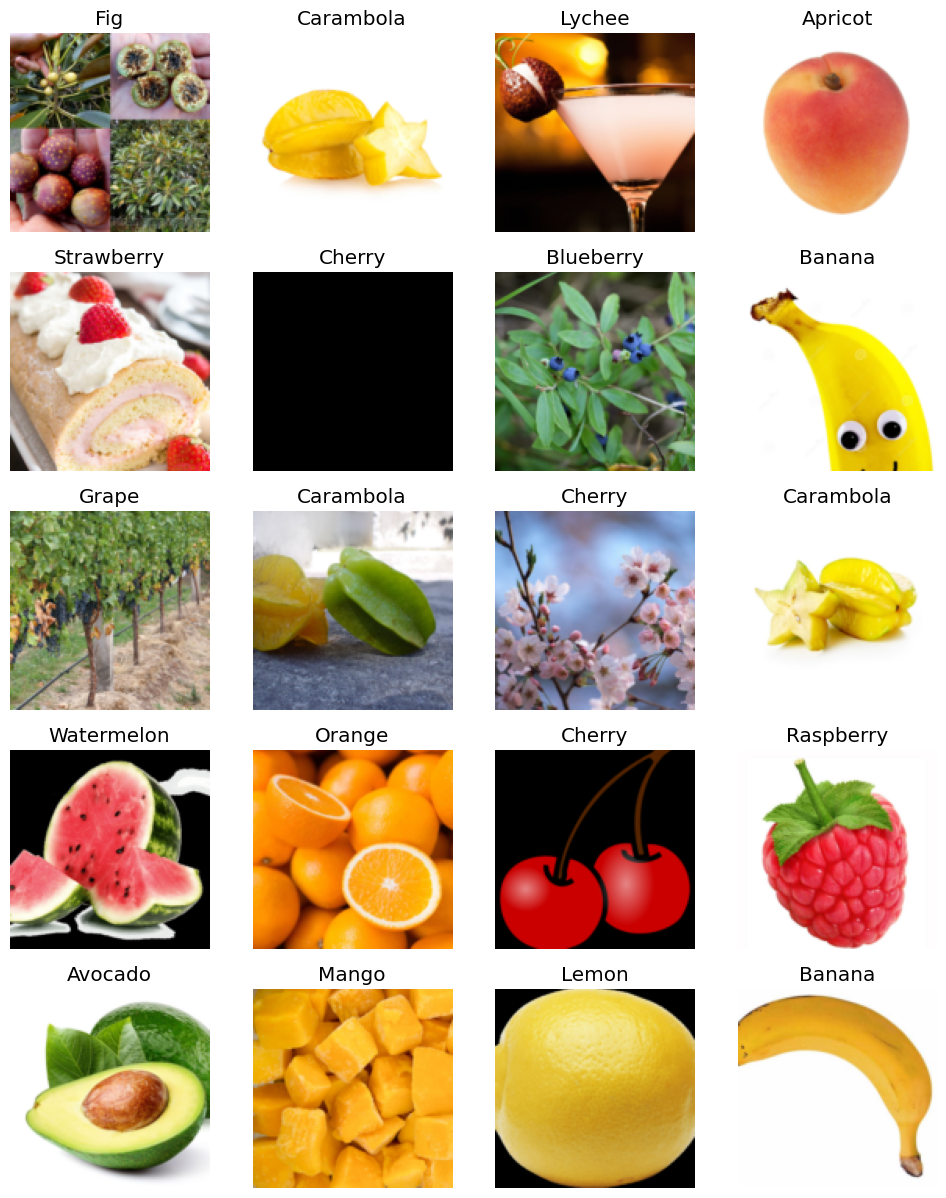

In [ ]:
dls.train.show_batch(max_n=25,nrows=5)

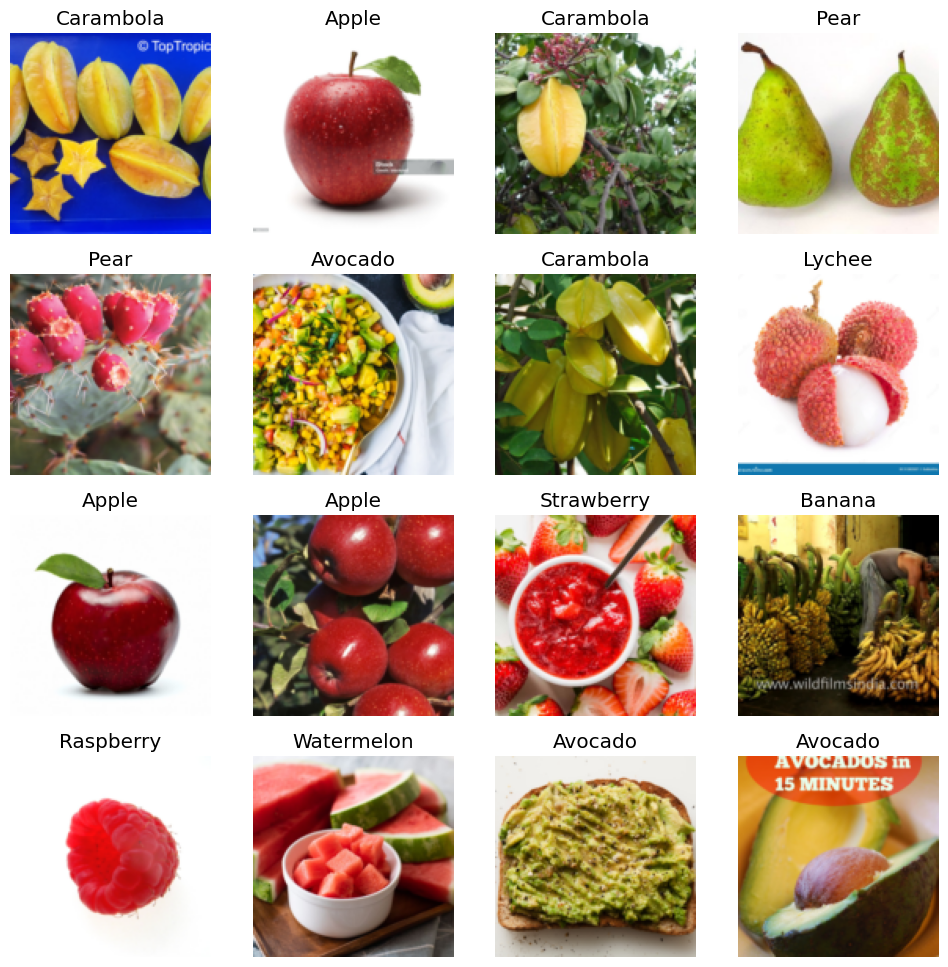

In [ ]:
dls.valid.show_batch(max_n=16,nrows=4)

# Data Augmentation

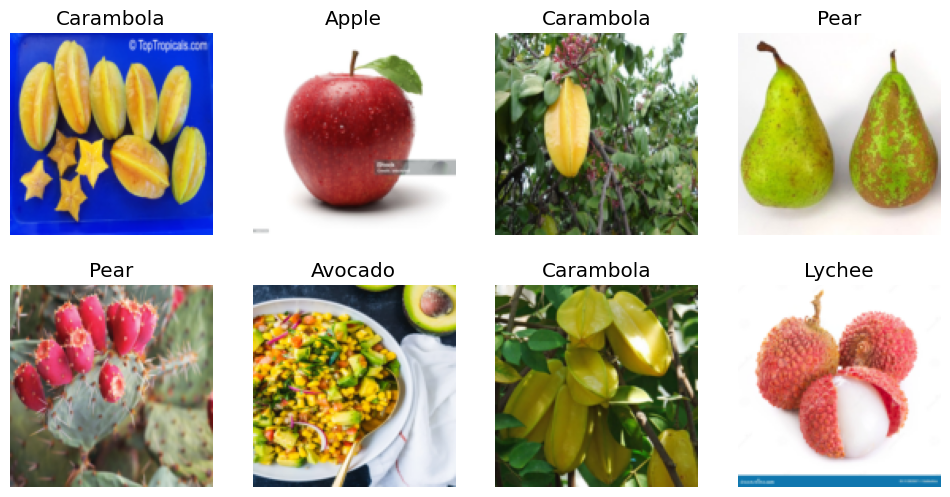

In [ ]:
dblock = data_block.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

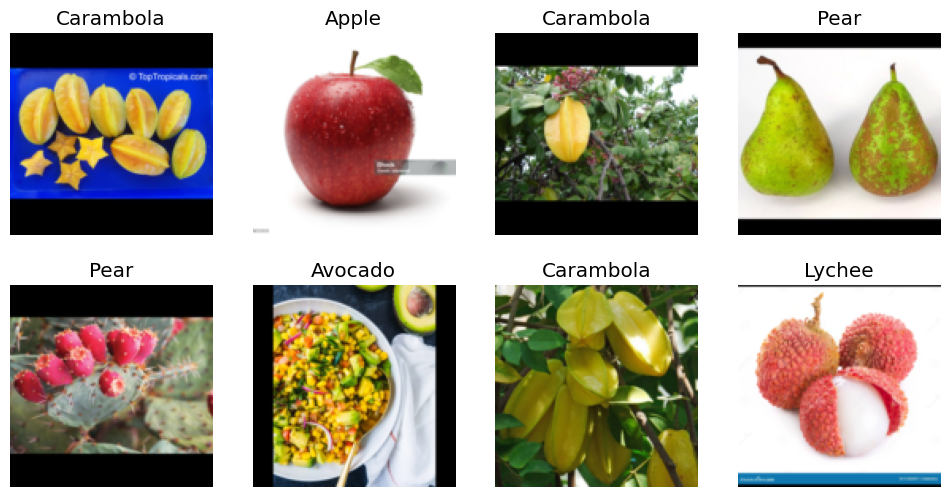

In [ ]:
dblock = data_block.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

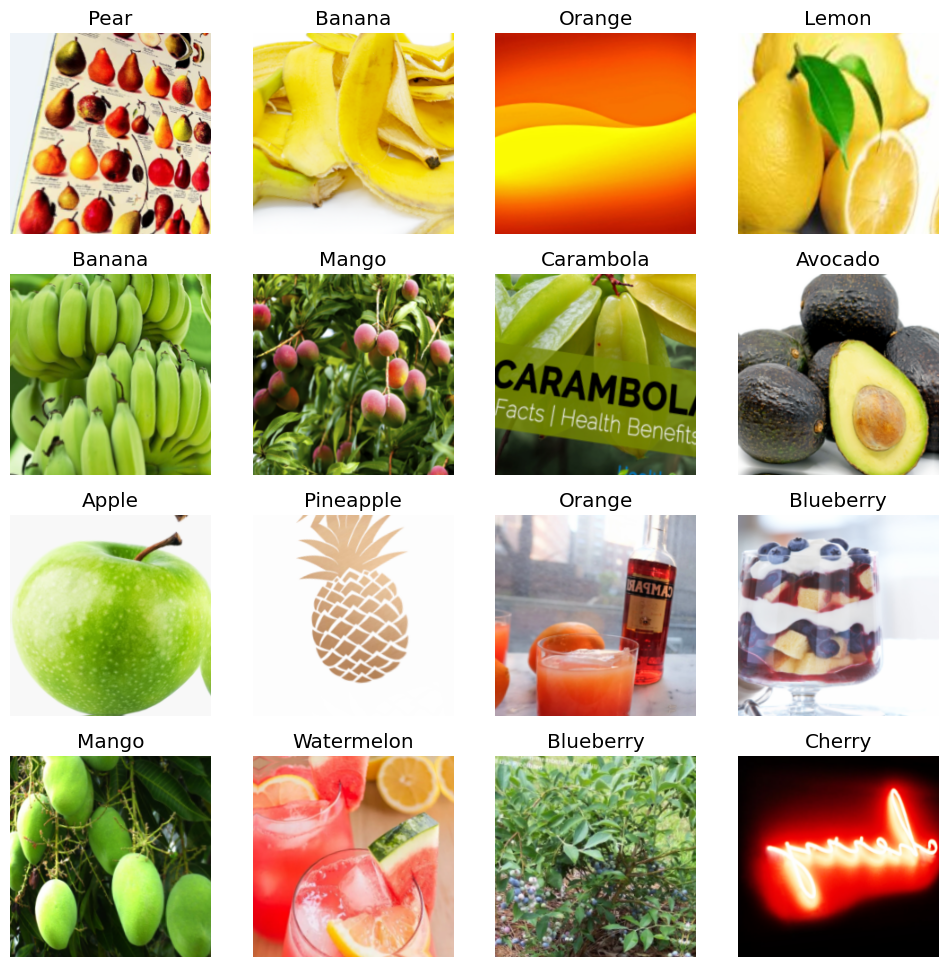

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = data_block.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
dls.train.vocab

['Apple', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Carambola', 'Cherry', 'Fig', 'Grape', 'Kiwi', 'Lemon', 'Lychee', 'Mango', 'Orange', 'Papaya', 'Pear', 'Pineapple', 'Raspberry', 'Strawberry', 'Watermelon']

In [ ]:
from fastai.vision.widgets import *

In [ ]:
version = 6

In [ ]:
torch.save(dls, f"fruit_dataloader_v{version}.pkl")
model_path = "models"

# model = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
model = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

model.save(f'fruit_model_v{version}')
model.load(f"fruit_model_v{version}")

In [ ]:
model.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109287315 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (92663508 pixels) exceeds limit of 89478485 pixels, could be decompression bomb 

In [ ]:
model.save(f"fruit_model_v{version}")

Path('models/fruit_model_v6.pth')

In [ ]:
model.load(f"fruit_model_v{version}")

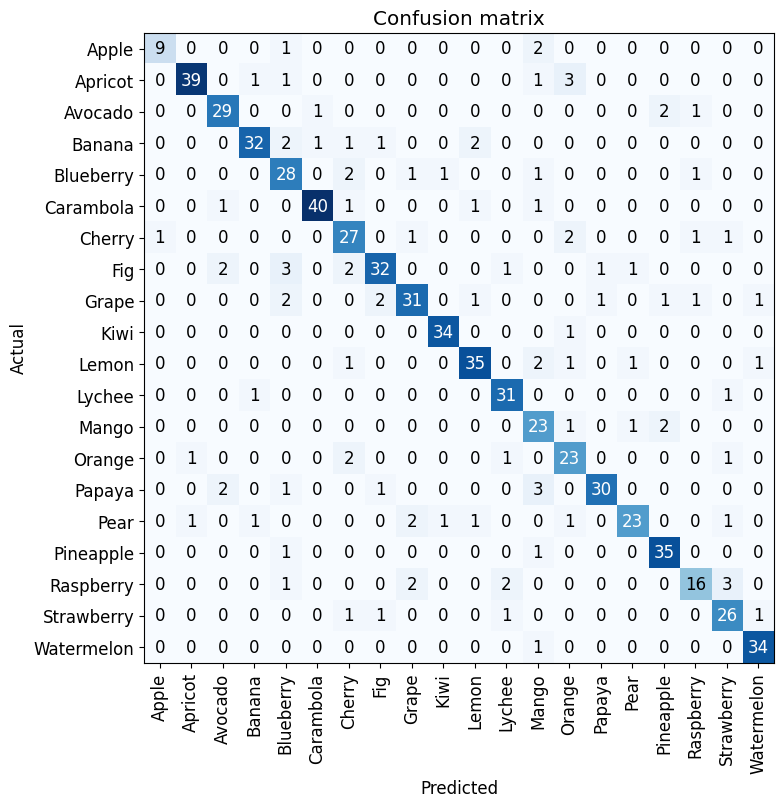

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(8,8))

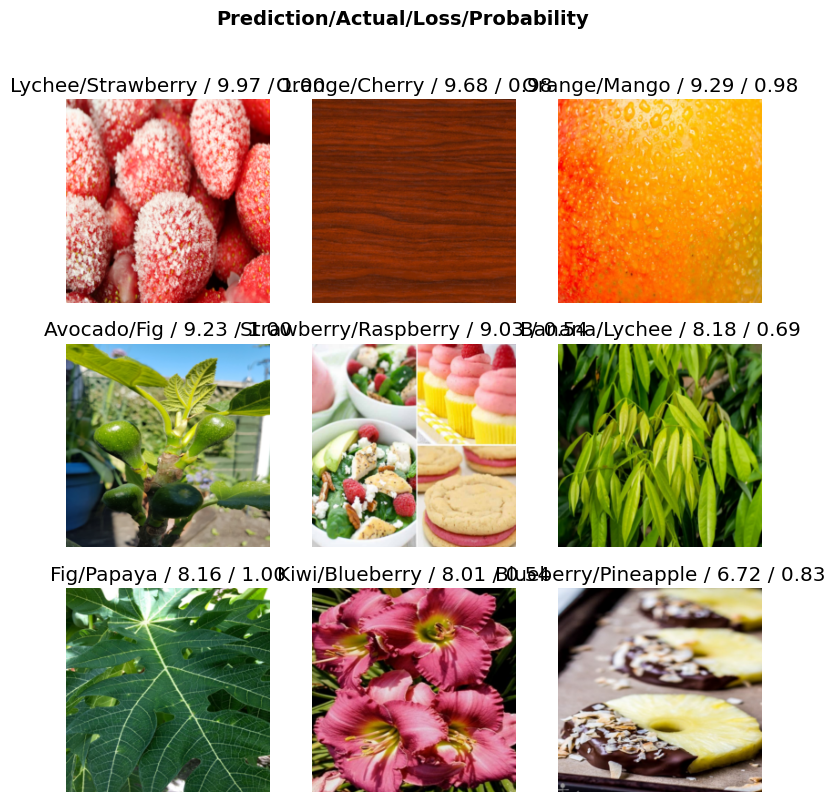

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
cleaner.delete()

In [ ]:
cleaner.change()

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [ ]:
model.export(f"{model_path}/fruit_model_v{version}.pkl")

In [ ]:
test_image_path="test_images"
model_path_pred=f"models/fruit_model_v{version}.pkl"
model=load_learner(model_path_pred)

# prediction_1

In [ ]:
img=Image.open(f"{test_image_path}/test_0.jpg")
img.to_thumb(224,224)

In [ ]:
model.predict(f'{test_image_path}/test_0.jpg')

# prediction_2

In [ ]:
img=Image.open(f"{test_image_path}/test_1.jpg")
img.to_thumb(224,224)

In [ ]:
model.predict(f'{test_image_path}/test_1.jpg')

# prediction_3

In [ ]:
img=Image.open(test_image_path+"/test_4.jpeg")
img.to_thumb(224,224)

In [ ]:
model.predict(test_image_path+"/test_2.jpg")